In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
import pandas as pd
import numpy as np

# ---------------------------------------------------------
# 1. Load train.csv (contains labels + pixels)
# ---------------------------------------------------------
df = pd.read_csv("digit-recognizer/train.csv")

# Features (pixels) normalized
X = df.iloc[:, 1:].values / 255.0

# Labels
y = df.iloc[:, 0].values

# ---------------------------------------------------------
# 2. Shuffle the dataset
# ---------------------------------------------------------
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

# ---------------------------------------------------------
# 3. Compute split sizes
# ---------------------------------------------------------
n = len(X)

train_size = int(0.7 * n)   # 70%
val_size   = int(0.2 * n)   # 20%
test_size  = n - train_size - val_size   # 10%

# ---------------------------------------------------------
# 4. Create the splits
# ---------------------------------------------------------
X_train = X[:train_size]
y_train = y[:train_size]

X_val = X[train_size : train_size + val_size]
y_val = y[train_size : train_size + val_size]

X_test = X[train_size + val_size :]
y_test = y[train_size + val_size :]

# ---------------------------------------------------------
# 5. Print shapes
# ---------------------------------------------------------
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (29399, 784) (29399,)
Validation: (8400, 784) (8400,)
Test: (4201, 784) (4201,)


In [12]:
def build_mlp(depth=3, width=256, num_classes=10):
    model = models.Sequential()
    # 1) Input layer
    model.add(layers.Input(shape=(784,)))
    # 2) Hidden layers
    for _ in range(depth):
        model.add(layers.Dense(width, activation="relu"))
    # 3) Output layer
    model.add(layers.Dense(num_classes, activation="softmax"))
    # 4) Compile
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [16]:
import time

def train_mlp(depth, width, epochs=10):
    model = build_mlp(depth=depth, width=width)
    start_time = time.time()
    history = model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            verbose=1
        )
    end_time = time.time()
    # Training time per epoch
    time_per_epoch = (end_time - start_time) / epochs
    # Total number of parameters
    total_params = model.count_params()
    return model, history, time_per_epoch, total_params


In [18]:
depths = [6, 8, 10, 15, 20, 30]

depth_histories = {}      # store full history objects
depth_final_acc = []
depth_final_loss = []
depth_val_final_acc = []
depth_val_final_loss = []
depth_time_per_epoch = []
depth_total_params = []

for d in depths:
    print(f"Training model with depth = {d} ...")
    
    model, history, tpe, params = train_mlp(depth=d, width=32, epochs=10)

    # Save entire history for plotting curves
    depth_histories[d] = history.history

    # Save final metrics for summary graphs
    depth_final_acc.append(history.history["accuracy"])
    depth_val_final_acc.append(history.history["val_accuracy"])
    depth_final_loss.append(history.history["loss"])
    depth_val_final_loss.append(history.history["val_loss"])

    # Save training time & parameters
    depth_time_per_epoch.append(tpe)
    depth_total_params.append(params)

print("Depth experiments complete.")


Training model with depth = 6 ...
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8383 - loss: 0.5195 - val_accuracy: 0.9143 - val_loss: 0.2890
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9348 - loss: 0.2217 - val_accuracy: 0.9396 - val_loss: 0.2125
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9485 - loss: 0.1719 - val_accuracy: 0.9476 - val_loss: 0.1795
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9569 - loss: 0.1424 - val_accuracy: 0.9475 - val_loss: 0.1785
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9618 - loss: 0.1273 - val_accuracy: 0.9439 - val_loss: 0.1980
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9644 - loss: 0.1141 - val_accuracy: 0.9560 - val_loss: 0.1501
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9687 - loss: 0.1011 - val_accuracy: 0.9474 - val_loss: 0.1919
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9703

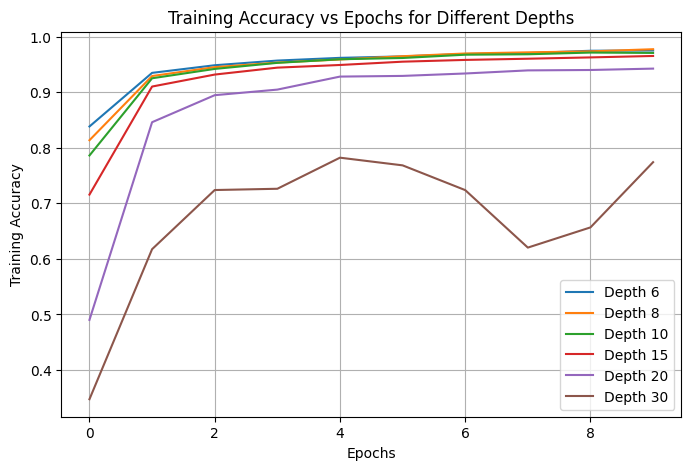

In [19]:
plt.figure(figsize=(8,5))

for d in depths:
    plt.plot(depth_histories[d]["accuracy"], label=f"Depth {d}")

plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy vs Epochs for Different Depths")
plt.legend()
plt.grid(True)
plt.show()


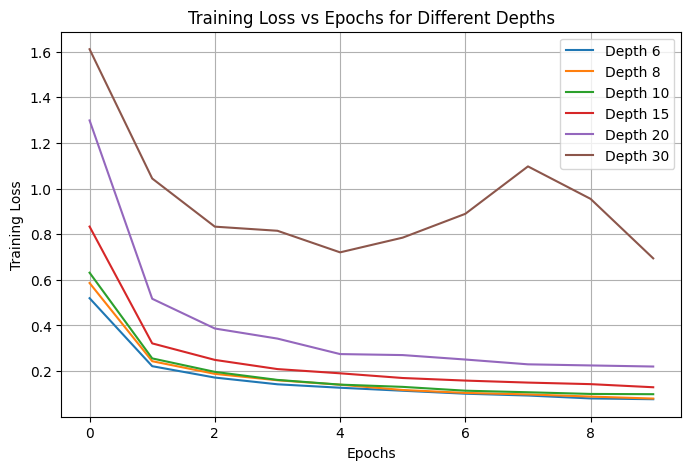

In [24]:
plt.figure(figsize=(8,5))

for d in depths:
    plt.plot(depth_histories[d]["loss"], label=f"Depth {d}")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss vs Epochs for Different Depths")
plt.legend()
plt.grid(True)
plt.show()


In [27]:
widths = [16, 32, 64, 128, 256, 512]

width_histories = {}
width_final_acc = []
width_val_final_acc = []
width_final_loss = []
width_val_final_loss = []
width_time_per_epoch = []
width_total_params = []

for w in widths:
    print(f"Training model with width = {w} ...")

    model, history, tpe, params = train_mlp(depth=10, width=w, epochs=10)

    # Save full history
    width_histories[w] = history.history

    # Final metrics
    width_final_acc.append(history.history["accuracy"])
    width_val_final_acc.append(history.history["val_accuracy"])
    width_final_loss.append(history.history["loss"])
    width_val_final_loss.append(history.history["val_loss"])

    # timing + params
    width_time_per_epoch.append(tpe)
    width_total_params.append(params)

print("Width experiments complete.")


Training model with width = 16 ...
Epoch 1/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5991 - loss: 1.1226 - val_accuracy: 0.8406 - val_loss: 0.5606
Epoch 2/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8786 - loss: 0.4407 - val_accuracy: 0.9014 - val_loss: 0.3514
Epoch 3/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9122 - loss: 0.3159 - val_accuracy: 0.9145 - val_loss: 0.3075
Epoch 4/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9281 - loss: 0.2608 - val_accuracy: 0.9207 - val_loss: 0.2795
Epoch 5/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9360 - loss: 0.2324 - val_accuracy: 0.9308 - val_loss: 0.2492
Epoch 6/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9410 - loss: 0.2126 - val_accuracy: 0.9262 - val_loss: 0.2670
Epoch 7/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9449 - loss: 0.1991 - val_accuracy: 0.9306 - val_loss: 0.2529
Epoch 8/10
919/919 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.948

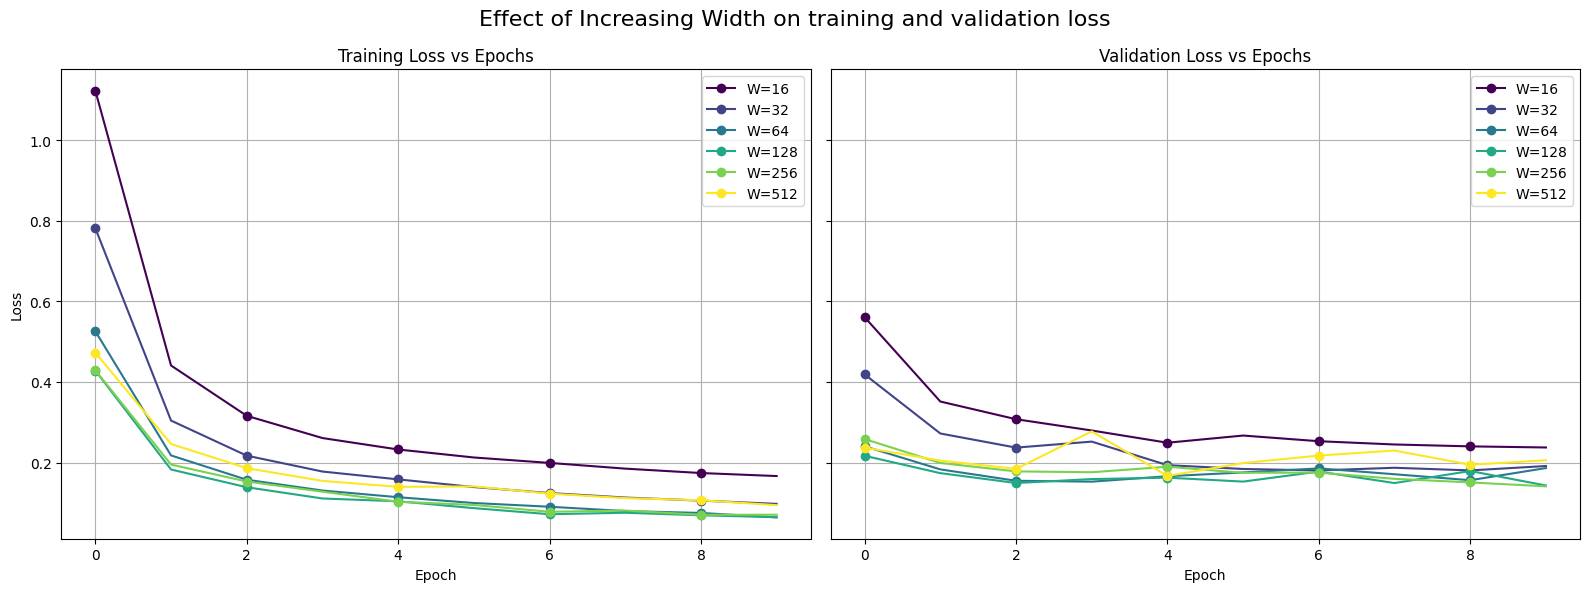

In [38]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Example widths and histories (replace with your actual data)
widths = [16, 32, 64, 128, 256, 512]

# Assume width_histories is a dictionary of Keras history objects
# Example format: width_histories[w] = {'loss':[...], 'val_loss':[...]} 

# Generate a color map for widths
colors = cm.viridis(np.linspace(0, 1, len(widths)))

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Plot Training Loss
for i, w in enumerate(widths):
    axes[0].plot(width_histories[w]['loss'], color=colors[i], label=f'W={w}', marker='o', markevery=2)
axes[0].set_title("Training Loss vs Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True)

# Plot Validation Loss
for i, w in enumerate(widths):
    axes[1].plot(width_histories[w]['val_loss'], color=colors[i], label=f'W={w}', marker='o', markevery=2)
axes[1].set_title("Validation Loss vs Epochs")
axes[1].set_xlabel("Epoch")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Effect of Increasing Width on training and validation loss", fontsize=16)
plt.tight_layout()
plt.show()


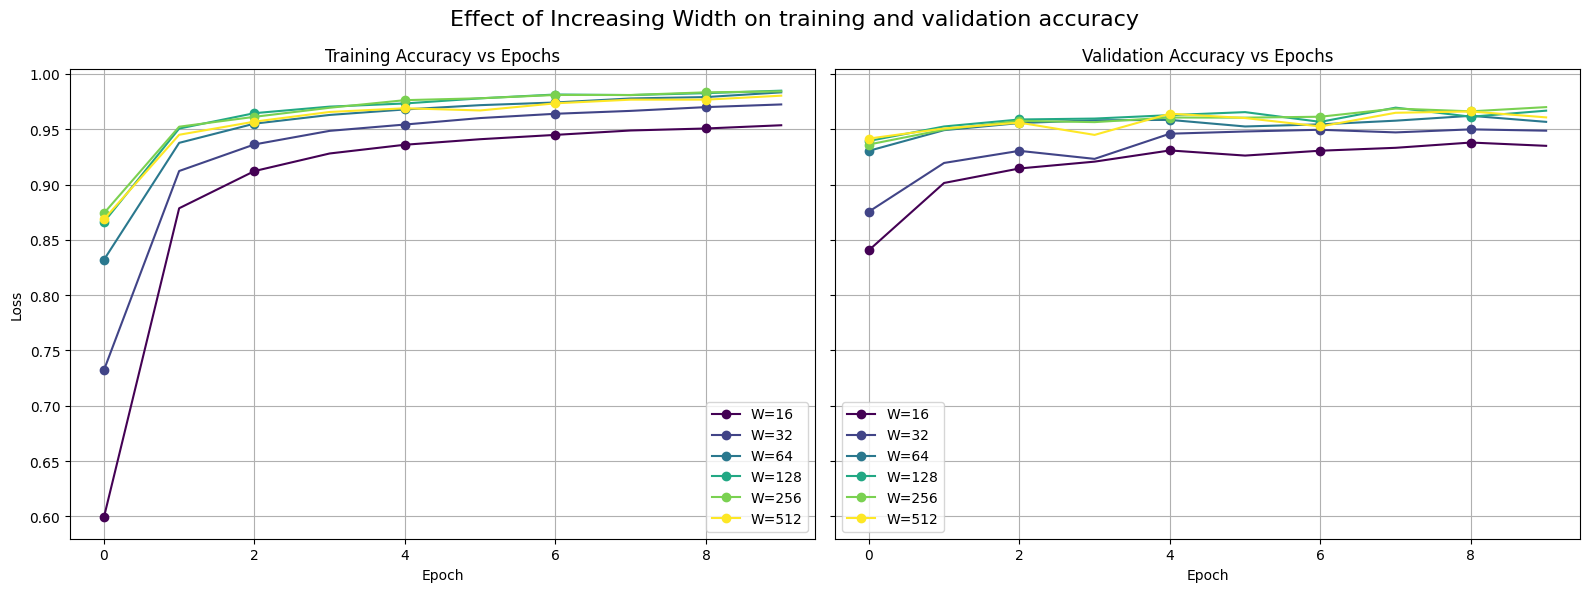

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Example widths and histories (replace with your actual data)
widths = [16, 32, 64, 128, 256, 512]

# Assume width_histories is a dictionary of Keras history objects
# Example format: width_histories[w] = {'loss':[...], 'val_loss':[...]} 

# Generate a color map for widths
colors = cm.viridis(np.linspace(0, 1, len(widths)))

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# Plot Training Loss
for i, w in enumerate(widths):
    axes[0].plot(width_histories[w]['accuracy'], color=colors[i], label=f'W={w}', marker='o', markevery=2)
axes[0].set_title("Training Accuracy vs Epochs")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True)

# Plot Validation Loss
for i, w in enumerate(widths):
    axes[1].plot(width_histories[w]['val_accuracy'], color=colors[i], label=f'W={w}', marker='o', markevery=2)
axes[1].set_title("Validation Accuracy vs Epochs")
axes[1].set_xlabel("Epoch")
axes[1].legend()
axes[1].grid(True)

plt.suptitle("Effect of Increasing Width on training and validation accuracy", fontsize=16)
plt.tight_layout()
plt.show()


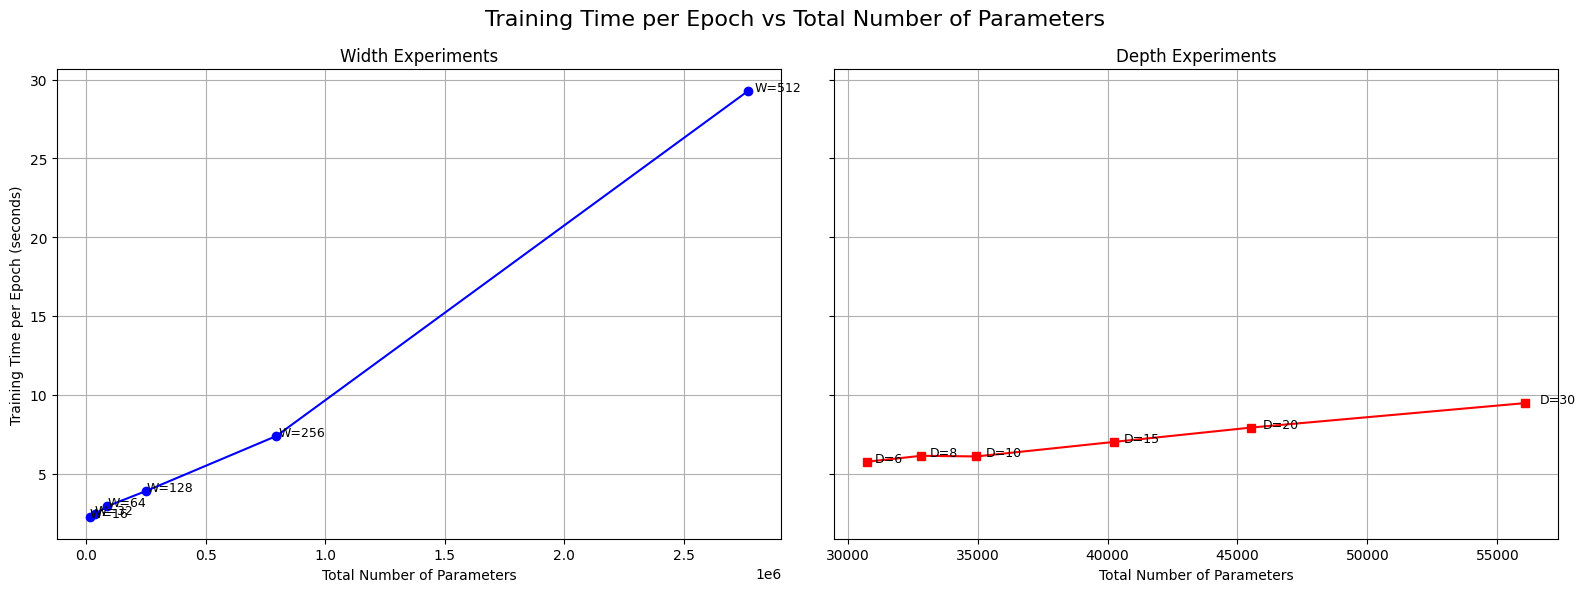

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# -------------------------------
# Width subplot
# -------------------------------
axes[0].plot(width_total_params, width_time_per_epoch, marker='o', linestyle='-', color='b')
axes[0].set_xlabel("Total Number of Parameters")
axes[0].set_ylabel("Training Time per Epoch (seconds)")
axes[0].set_title("Width Experiments")
axes[0].grid(True)

# Annotate points with width
for i, w in enumerate(widths):
    axes[0].text(width_total_params[i]*1.01, width_time_per_epoch[i], f"W={w}", fontsize=9)

# -------------------------------
# Depth subplot
# -------------------------------
axes[1].plot(depth_total_params, depth_time_per_epoch, marker='s', linestyle='-', color='r')
axes[1].set_xlabel("Total Number of Parameters")
axes[1].set_title("Depth Experiments")
axes[1].grid(True)

# Annotate points with depth
for i, d in enumerate(depths):
    axes[1].text(depth_total_params[i]*1.01, depth_time_per_epoch[i], f"D={d}", fontsize=9)

plt.suptitle("Training Time per Epoch vs Total Number of Parameters", fontsize=16)
plt.tight_layout()
plt.show()


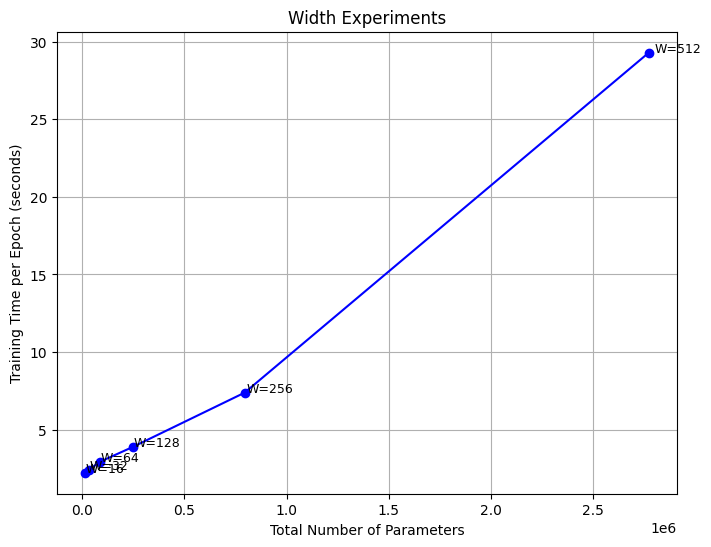

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Plot width experiments
plt.plot(width_total_params, width_time_per_epoch, marker='o', linestyle='-', color='b')
plt.xlabel("Total Number of Parameters")
plt.ylabel("Training Time per Epoch (seconds)")
plt.title("Width Experiments")
plt.grid(True)

# Annotate points with width
for i, w in enumerate(widths):
    plt.text(width_total_params[i]*1.01, width_time_per_epoch[i], f"W={w}", fontsize=9)

plt.show()
